## 1. 파일 로드, shape 확인

In [26]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다,
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


## 2. 이미지 확인 train, test

In [27]:
y_train.shape # 라벨 == 10

(60000,)

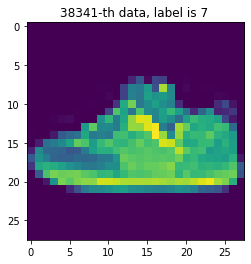

In [28]:
import matplotlib.pyplot as plt
import numpy as np

sample_size = 1
# 0~59999의 범위에서 무작위로 3개의 정수를 뽑습니다
random_idx = np.random.randint(60000, size =sample_size)

for idx in random_idx:
  img = x_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label is %d ' % (idx,label))

Text(0.5, 1.0, '38341-th data, label is 9')

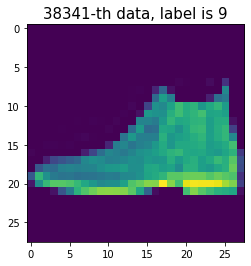

In [29]:
# 마지막에 예측해볼 데이터
img = x_test[0,:]
label = y_test[0]
plt.figure()
plt.imshow(img)
plt.title('%d-th data, label is %d' % (idx, label), fontsize = 15)

## 3. 검증데이터셋 분리 사용X

In [25]:
# from sklearn.model_selection import train_test_split

# # 훈련/테스트 데이터를 분리
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
#                                                   test_size = 0.3,)
# print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
# print(f'검증 데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (42000, 28, 28) 레이블 (42000,)
검증 데이터 (18000, 28, 28) 레이블 (18000,)


## 4. 전처리

### 4-1 정규화

In [30]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

print(x_train.shape)

(60000, 784)


### 4-2 원핫인코딩

In [31]:
from tensorflow.keras.utils import to_categorical

# 각 데이터를 범주형 데이터로 변경
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 5. 모델 생성, HiddenLayer 설정
## 6. Optimizer(최적화), loss function(손실함수)
## 7. 모델 학습

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(256, activation='relu', input_shape = (784,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size = 128,
                    validation_split=0.3,
                    shuffle = True)

Epoch 1/20
329/329 [==============================] - 2s 5ms/step - loss: 0.5694 - acc: 0.7994 - val_loss: 0.4380 - val_acc: 0.8466
Epoch 2/20
329/329 [==============================] - 1s 4ms/step - loss: 0.3945 - acc: 0.8582 - val_loss: 0.3751 - val_acc: 0.8653
Epoch 3/20
329/329 [==============================] - 1s 4ms/step - loss: 0.3538 - acc: 0.8703 - val_loss: 0.4065 - val_acc: 0.8532
Epoch 4/20
329/329 [==============================] - 1s 4ms/step - loss: 0.3233 - acc: 0.8803 - val_loss: 0.3712 - val_acc: 0.8641
Epoch 5/20
329/329 [==============================] - 1s 4ms/step - loss: 0.3056 - acc: 0.8866 - val_loss: 0.3495 - val_acc: 0.8741
Epoch 6/20
329/329 [==============================] - 1s 4ms/step - loss: 0.2922 - acc: 0.8910 - val_loss: 0.3218 - val_acc: 0.8868
Epoch 7/20
329/329 [==============================] - 1s 4ms/step - loss: 0.2728 - acc: 0.8976 - val_loss: 0.3436 - val_acc: 0.8780
Epoch 8/20
329/329 [==============================] - 1s 4ms/step - loss: 0.

## 8. 손실, 정확도 그래프

313/313 [==============================] - 1s 2ms/step - loss: 0.3655 - acc: 0.8833
정확도 :  [0.36548614501953125, 0.8833000063896179]


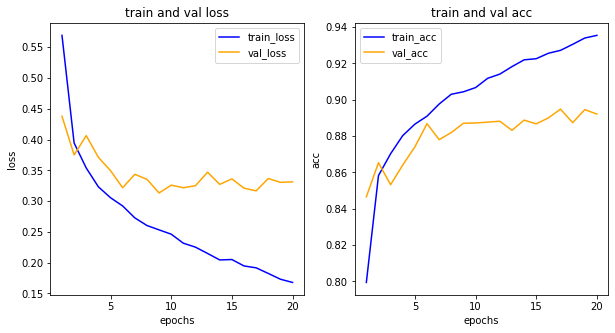

In [39]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

print('정확도 : ', model.evaluate(x_test, y_test))

## 9. 혼동행렬 & report

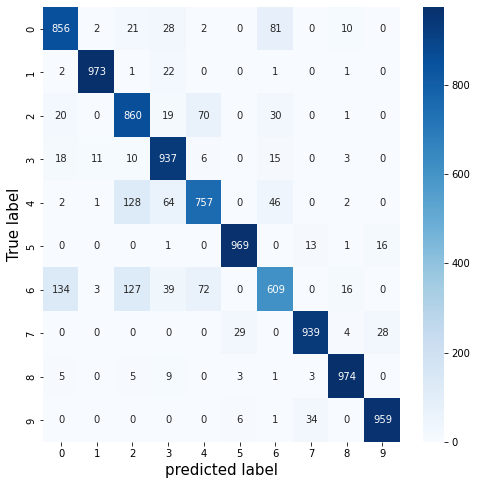

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 혼동 행렬을 만듭니다.
results = model.predict(x_test)
plt.figure(figsize = (8,8))
cm = confusion_matrix(np.argmax(y_test, axis = -1), # argmax
                       np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label', fontsize = 15)
plt.ylabel('True label', fontsize = 15)
plt.show()

In [43]:
print('\n', classification_report(np.argmax(y_test, axis = -1),
                                  np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.75      0.86      0.80      1000
           3       0.84      0.94      0.88      1000
           4       0.83      0.76      0.79      1000
           5       0.96      0.97      0.97      1000
           6       0.78      0.61      0.68      1000
           7       0.95      0.94      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

